# 2015 general election analysis

We'll start by importing the packages and datasets we're going to use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import utilities as election_helper
import visualisations as vis

In [2]:
# Table for all constituencies from 2010 onwards
constits_df = pd.read_csv("csvs/final_datasets/constits.csv")

# complete election data for past constituency sets
ge1997_2001_df = pd.read_csv("csvs/final_datasets/ge1997_2001.csv")
ge2005_df = pd.read_csv("csvs/final_datasets/ge2005.csv")

# british election study data
bes_w6_df = pd.read_csv("csvs/final_datasets/bes_w6.csv")

# Colour map
ge_colour_map = election_helper.get_ge_colour_map()

/home/graeme/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (427,430) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Overview

To guide our research, we'll start by creating some overview visualisations and analysis.

=== 2015 general election summary (compared with 2010)

SEATS WON: 
con       330 (+24)
lab       232 (-26)
snp       56 (+50)
dup       8 (+0)
ld        8 (-49)
sf        4 (+0)
pc        3 (+0)
sdlp      3 (+0)
uup       2
ukip      1
green     1 (+0)
ind       1
spk       1

VOTE SHARE:
con       36.8% (+0.8%)
lab       30.4% (+1.5%)
ld        7.9% (-15.2%)
ukip      12.6% (+9.5%)
green     3.8% (+2.8%)
snp       4.7% (+3.1%)
pc        0.6% (+0.0%)
dup       0.6% (+0.0%)
sf        0.6% (-0.0%)
sdlp      0.3% (-0.0%)
uup       0.4% (+0.0%)
alliance  0.2% (+0.1%)
other     1.1% (-2.6%)



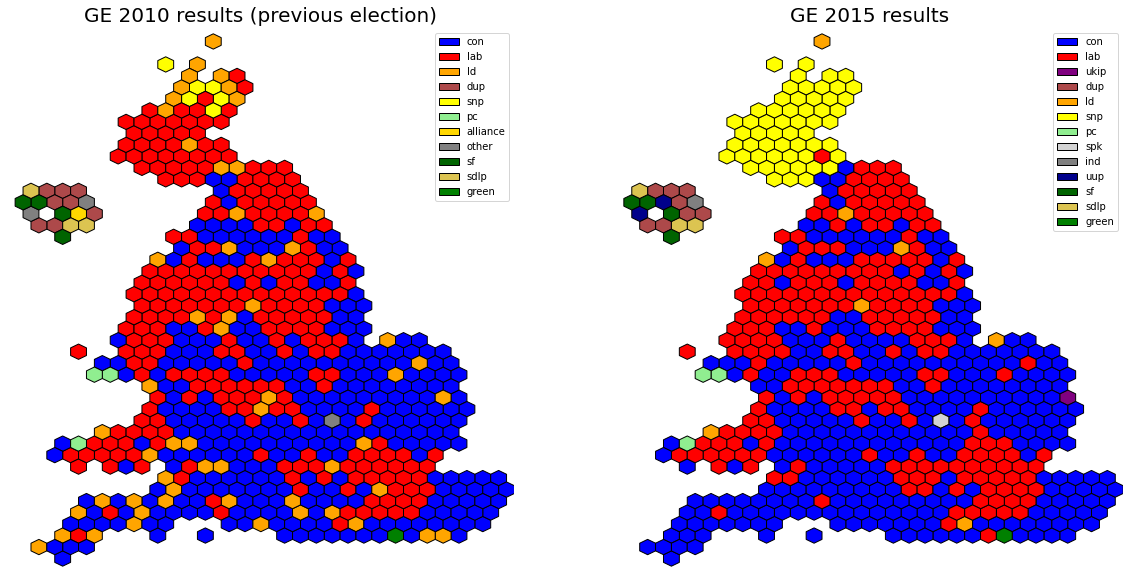

In [3]:
parties_2010 = election_helper.get_election_parties(constits_df, "2010")
constits_df.loc[:, "2010_first_party"] = constits_df.apply(election_helper.calculate_constit_winners, year="2010", parties=parties_2010, axis=1)
constits_df.loc[:, "2010_second_party"] = constits_df.apply(election_helper.calculate_constit_runnerup, year="2010", parties=parties_2010, axis=1)

constits_df.loc[constits_df["constituency_name"] == "buckingham", "constituency_name"] = "spk"
constits_df.loc[:, "2015_first_party"] = constits_df["2015_first_party"].str.lower()

election_helper.print_summary_election_result(constits_df, "2015", constits_df, "2010")

# 2015 constituency visualisation
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
vis.create_discrete_constit_map(constits_df, "2010_first_party", ax=ax[0], title="GE 2010 results (previous election)")
vis.create_discrete_constit_map(constits_df, "2015_first_party", ax=ax[1], title="GE 2015 results")

In [4]:
print("Aggregate level volatility:  " + str(election_helper.calculate_net_volatility(constits_df, "2010", "2015")) + "%")
print("Individual level volatility: " + str(election_helper.estimate_individual_volatility(bes_w6_df, "p_past_vote_2010", "p_past_vote_2015", "wt")) + "%")

Aggregate level volatility:  17.806757152271384%
Individual level volatility: 38.98798281810417%


Overview analysis:
- The Liberal Democrats lost over 85% of their seats. Losses look especially painful in Scotland and south west England.
- UKIP, the Green Party and the SNP all more than doubled their share of the vote. However, due to the electoral system we have a situation where UKIP received over 2 and a half times the votes that the SNP received but won only 1 seat compared to  56.
- The Conservatives were able to increase their total number of seats to 330 off the back of 24 gains and less than a 1 perecentage point increase in the overall vote, enough to form a majority in parliment. Labour on the other hand saw their vote share increase by 1.5 percentage points whilst making a net loss of 26 seats emphasising the disproportionate characteristics of the FPTP system.
- The SNP became a major player taking almost the entirety of Scotland dislodging Labour's grip north of the border. Meanwhile, nationalists in both Wales and Northern Ireland didn't make any gains.
- There was an aggregate level change of 17.8% change in the election outcome. However, I estimate that somewhere near 39% of voters voted for a different party in 2010 to 2015. The aggregate level number therefore hides flows that must have occured under the surface.

Let's now look at how the parties' vote shares changed.

/home/graeme/Code/JupyterNotebooks/Election Data Science/utilities.py:213: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col_name] = df.apply(calculate_share_change, args=(year, compare_year, party), axis=1)


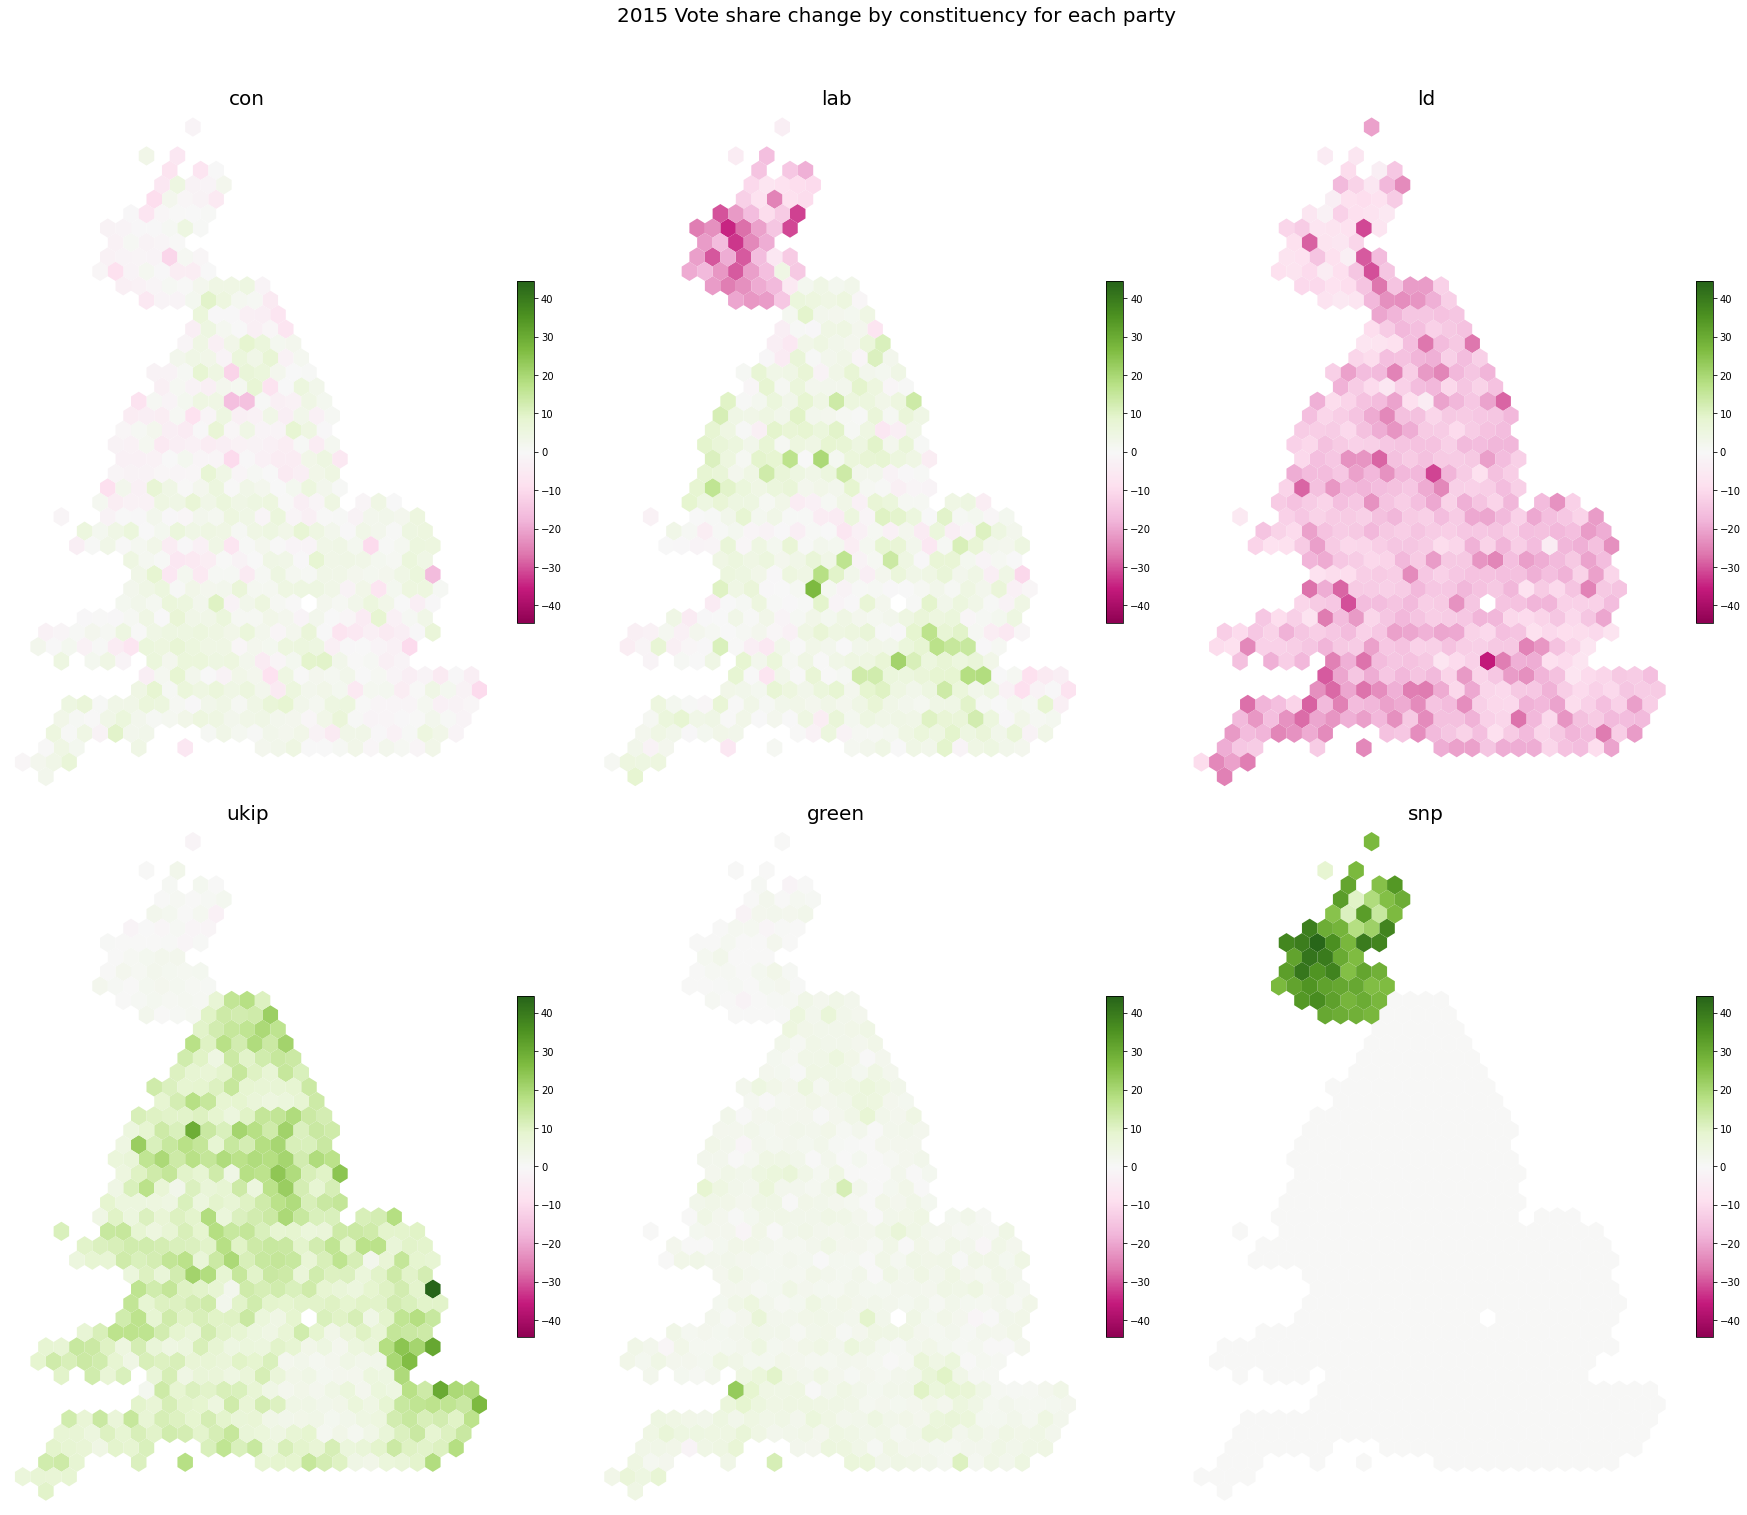

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(25, 20))

constits_df = election_helper.create_vote_share_change_maps_and_columns(
    df=constits_df[constits_df["region_name"] != "northern ireland"],
    year="2015",
    compare_year="2010",
    party_cols_to_map=["con", "lab", "ld", "ukip", "green", "snp"],
    fig=fig,
    axes=axes)

fig.suptitle("2015 Vote share change by constituency for each party", fontsize=20, y = 1.05)
print()

Geographical analysis of vote share change:
- In Scotland, trends look clear and consistent. Labour and the Liberal Democrats suffered signifcant losses in almost every constituency. The Conservative vote stayed broadly stable with some losses. The SNP made huge gains across the country.
- In England and Wales, the Conservatives and Labour mostly made gains on a constituency by constituency basis. Overall, the gains look stronger for Labour with some significantly large gains in some seats in England. The Conservatives specifically seem to have suffered losses in the north west.
- UKIP made gains in almost every constituency. They had some very strong preformances in specific constituencies, some of them situated in the south east of England.

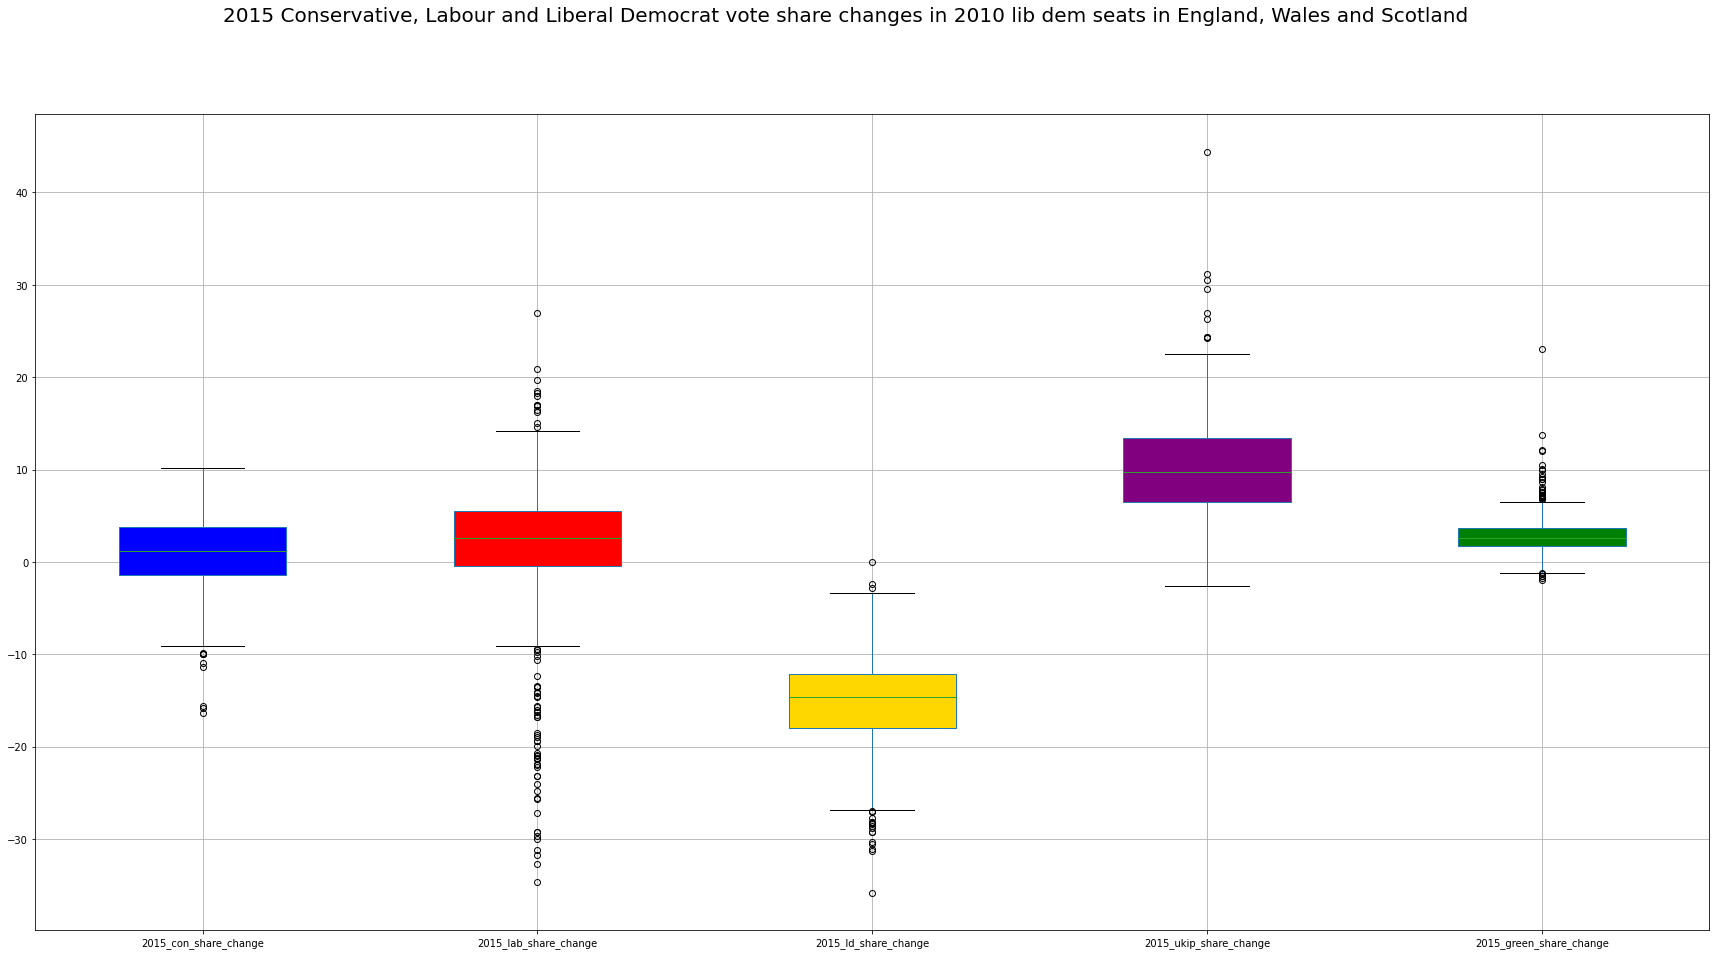

Conservative vote share change at constituency level summary statistics:
Min:    -16.37029627132933
Q1:     -1.425477091629796
Median: 1.2072210571556206
Q3:     3.7603195291444775
Max:    10.156562999976254
Mean:   0.9833807070256927
Mode:   -16.37029627132933
SD:     3.912492201011784
Skew:   -0.6566766544787203
Kurto:  1.2836952877746284

Labour vote share change at constituency level summary statistics:
Min:    -34.65648611131107
Q1:     -0.4395519884741919
Median: 2.554104350800614
Q3:     5.5454313359294725
Max:    26.91263587430474
Mean:   1.3740112363189951
Mode:   -34.65648611131107
SD:     7.96168436988619
Skew:   -1.6443804019778405
Kurto:  4.521831272821611

Liberal Democrat vote share change at constituency level summary statistics:
Min:    -35.81417518624806
Q1:     -18.006942083153263
Median: -14.64551424486207
Q3:     -12.074851282154238
Max:    0.0
Mean:   -15.332055461324703
Mode:   -35.81417518624806
SD:     5.152740380193186
Skew:   -0.5493190883116492
Kurto:  0.639

In [6]:
fig, ax = plt.subplots(figsize=(30, 15))
boxp = constits_df[constits_df["region_name"] != "northern ireland"].boxplot(column=["2015_con_share_change", "2015_lab_share_change", "2015_ld_share_change", "2015_ukip_share_change", "2015_green_share_change"], ax=ax, return_type='both', patch_artist = True)
fig.suptitle("2015 Conservative, Labour and Liberal Democrat vote share changes in 2010 lib dem seats in England, Wales and Scotland", fontsize=20)
boxp[1]["boxes"][0].set_facecolor("blue")
boxp[1]["boxes"][1].set_facecolor("red")
boxp[1]["boxes"][2].set_facecolor("gold")
boxp[1]["boxes"][3].set_facecolor("purple")
boxp[1]["boxes"][4].set_facecolor("green")
plt.show()

print("Conservative vote share change at constituency level summary statistics:")
election_helper.print_descriptive_summary_statistics(constits_df[constits_df["region_name"] != "northern ireland"]["2015_con_share_change"])
print()
print("Labour vote share change at constituency level summary statistics:")
election_helper.print_descriptive_summary_statistics(constits_df[constits_df["region_name"] != "northern ireland"]["2015_lab_share_change"])
print()
print("Liberal Democrat vote share change at constituency level summary statistics:")
election_helper.print_descriptive_summary_statistics(constits_df[constits_df["region_name"] != "northern ireland"]["2015_ld_share_change"])
print()
print("UKIP vote share change at constituency level summary statistics:")
election_helper.print_descriptive_summary_statistics(constits_df[constits_df["region_name"] != "northern ireland"]["2015_ukip_share_change"])
print()

Boxplot analysis of vote sahre change:
- The boxplots mostly confirm the findings we have already made. It will be interesting to look at boxplots once restricted to certain geographical areas.
- The inter quartiles ranges of Labour and the Conservatives are quite similar. Whilst some stronger preformances in England and Wales pull the distribution of Labour's data further into the positive direction, the heavy deffeats they suffered in Scotland that the Conservatives did not simultaneously pulls the distribution of their gains in a negative direction. Therefore it follows that there are far more outlier points for Labour and the standard deviation of their vote share change is about 2 times as large as the Conservatives. I presume that the Labour outliers below 2 SDs of the median are losses in Scotland. This would indicate a heavily tailed distirbution for Labour which is proven by the kurtosis score resulting in a leptokurtic distribution.

To further analyse the election result, I'll now look at some specific topics. Conveniently, due to the result result in Scotland we can limit different parts of our analysis to just Scotland and also just England and Wales.

## SNP win Scotland

In [11]:
election_helper.print_summary_election_result(constits_df[constits_df["region_name"] == "scotland"], "2015", constits_df[constits_df["region_name"] == "scotland"], "2010", additional_title="Only Scotland")

=== 2015 general election summary (compared with 2010)
=== Only Scotland

SEATS WON: 
snp       56 (+50)
con       1 (+0)
lab       1 (-40)
ld        1 (-10)

VOTE SHARE:
con       14.9% (-1.8%)
lab       24.3% (-17.7%)
ld        7.5% (-11.3%)
ukip      1.6% (+0.9%)
green     1.3% (+0.7%)
snp       50.0% (+30.0%)
pc        0.0% (+0.0%)
dup       0.0% (+0.0%)
sf        0.0% (+0.0%)
sdlp      0.0% (+0.0%)
uup       0.0% (+0.0%)
alliance  0.0% (+0.0%)
other     0.3% (-0.8%)



Overview analysis:
- Only 3 parties had their vote sare change by more than 2%.
- Labour and the Liberal democrats lost all but 1 of their seats whilst, losing 29% of their combined vote share.
- The SNP won all but 3 seats, going from winning 10% of the seats in 2010 to 95% in 2015. Their share of the national vote went up by 30%. Half of the votes cast in Scotland were for the SNP.

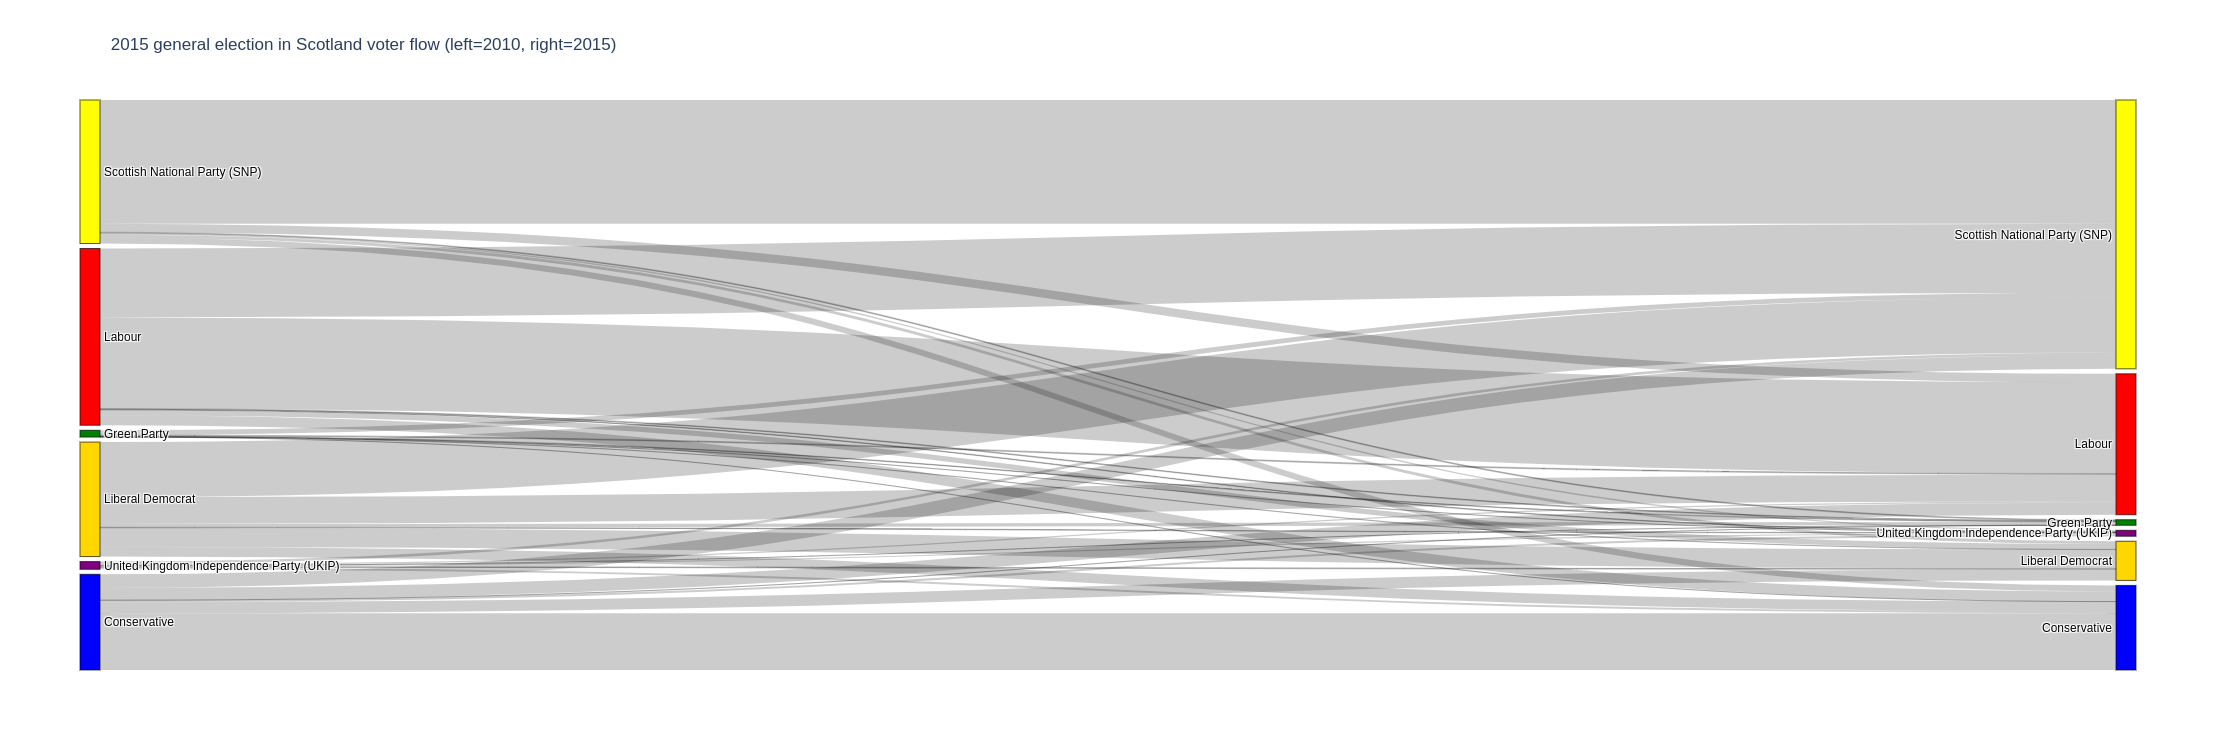

Scotland aggregate level volatility:  31.628091840274138%
Scotland individual level volatility: 47.11472274141184%


In [28]:
sankey_parties = ["Scottish National Party (SNP)", "Labour",  "Conservative","Liberal Democrat", "United Kingdom Independence Party (UKIP)", "Green Party"]
sankey_party_colours = ["yellow", "red", "blue", "gold", "purple", "green"]

vis.create_voter_flow_diagram(bes_df=bes_w6_df[bes_w6_df["country"] == "Scotland"], 
                                          past_election_column="p_past_vote_2010", 
                                          current_election_column="general_election_vote",
                                          weight_column="wt",
                                          parties=sankey_parties,
                                          party_colours=sankey_party_colours,
                                          dont_include=["Don't know", "Didn't vote"],
                                          title="2015 general election in Scotland voter flow (left=2010, right=2015)",
                                          other=False)

print("Scotland aggregate level volatility:  " + str(election_helper.calculate_net_volatility(constits_df[constits_df["region_name"] == "scotland"], "2010", "2015")) + "%")
print("Scotland individual level volatility: " + str(election_helper.estimate_individual_volatility(bes_w6_df[bes_w6_df["country"] == "Scotland"], "p_past_vote_2010", "p_past_vote_2015", "wt")) + "%")

This is a Sankey diagram. They are used to represent flows. Here it represents how voters in Scotland changed their votes between the 2010 and 2015 elections.

Flow analysis: 
- Around 1/3 of 2010 Labour voters and just under half of 2010 Liberal Democrat voters switched to the SNP in 2015. Some small gains were also taken from the Conservatives.voted SNP in 2015. Just under half of 2010 Liberal Democrat voters voted.
- Individual level volatility was about 1 and a half times as much as aggregate level volatility. The Scottish electorate was very volatile from 2010 to 2015.

So the story in Scotland seems rather straight forward and consistent. The SNP made hude gains mainly off the back of Labour and the Liberal Democrats. The rest of the electorate stayed boradly the same, both overall and geographically.

## Where did the lib dems seats go?

Only 632 constituencies were animated
Only 632 constituencies were animated


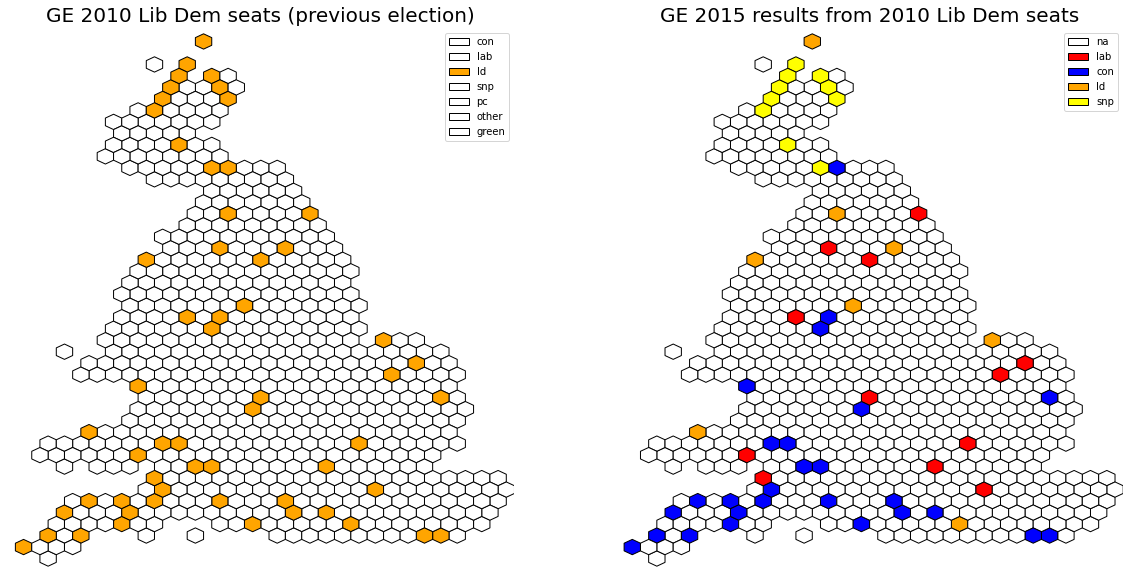

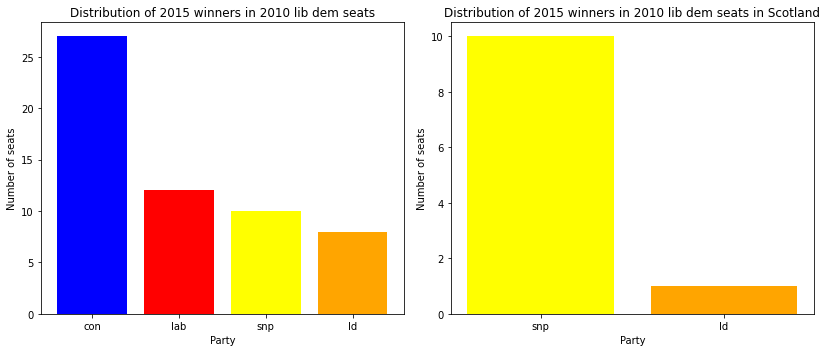

In [12]:
# 2015 constituency visualisation
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
# This needs fixing to be a smaller data frame
vis.create_discrete_constit_map(constits_df, "2010_first_party", ax=ax[0], title="GE 2010 Lib Dem seats (previous election)", constit_colour_map={"ld": "orange"})
ld_2010_to_2015_visualisation_df = constits_df.filter(items=["ons_id", "2010_first_party", "2015_first_party"])
ld_2010_to_2015_visualisation_df.loc[(ld_2010_to_2015_visualisation_df["2010_first_party"] != "ld"), "2015_first_party"] = "na"
vis.create_discrete_constit_map(ld_2010_to_2015_visualisation_df, "2015_first_party", ax=ax[1], title="GE 2015 results from 2010 Lib Dem seats")

fig, axes = plt.subplots(1, 2, figsize=(12,5))

lib_dem_2010_wins_df = constits_df[(constits_df["2010_first_party"] == "ld")]
val_counts = lib_dem_2010_wins_df["2015_first_party"].value_counts()
axes[0].bar(val_counts.index,
        val_counts.values,
        color=[ge_colour_map[party] for party in val_counts.index])
axes[0].set_title("Distribution of 2015 winners in 2010 lib dem seats")
axes[0].set_xlabel("Party")
axes[0].set_ylabel("Number of seats")

val_counts = lib_dem_2010_wins_df[lib_dem_2010_wins_df["region_name"] == "scotland"]["2015_first_party"].value_counts()
axes[1].bar(val_counts.index,
        val_counts.values,
        color=[ge_colour_map[party] for party in val_counts.index])
axes[1].set_title("Distribution of 2015 winners in 2010 lib dem seats in Scotland")
axes[1].set_xlabel("Party")
axes[1].set_ylabel("Number of seats")

fig.tight_layout()

Insights:
- In Scotland, the SNP took all but one of the LDs seats.
- In England and Wales, the LDs retained only 7 of their seats 46 seats. The Conservatives were the primary beneficaires of their collapse, taking over twice as many seats from the LDs as Labour did.

Let's explore the electoral makeup of the LD's 2010 seats in England and Wales. I am not looking at Scotland as analysis elsewhere in this document explains the trends that lead to the SNP sweaping away all parties, not just the LDs.

In [13]:
# I want to create 2 graphs. The first will have left to right wing on the x-axis and change in liberal democrat like from 2010-2015. 
# The second will be the same but working on the liberal-authoritarian axis.

Text(0, 0.5, 'Number of seats')

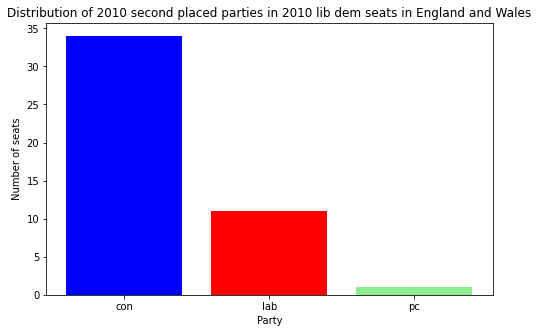

In [14]:
fig, ax = plt.subplots(figsize=(8,5))

lib_dem_2010_wins_not_in_scotland_df = lib_dem_2010_wins_df[lib_dem_2010_wins_df["region_name"] != "scotland"]
val_counts = lib_dem_2010_wins_not_in_scotland_df["2010_second_party"].value_counts()
ax.bar(val_counts.index,
        val_counts.values,
        color=[ge_colour_map[party] for party in val_counts.index])
ax.set_title("Distribution of 2010 second placed parties in 2010 lib dem seats in England and Wales")
ax.set_xlabel("Party")
ax.set_ylabel("Number of seats")

From a surface level view, we can see that the party that was most frequently the closest to the LDs in their 2010 seats were the Conservatives putting them in poll position to gain from the LD collapse.

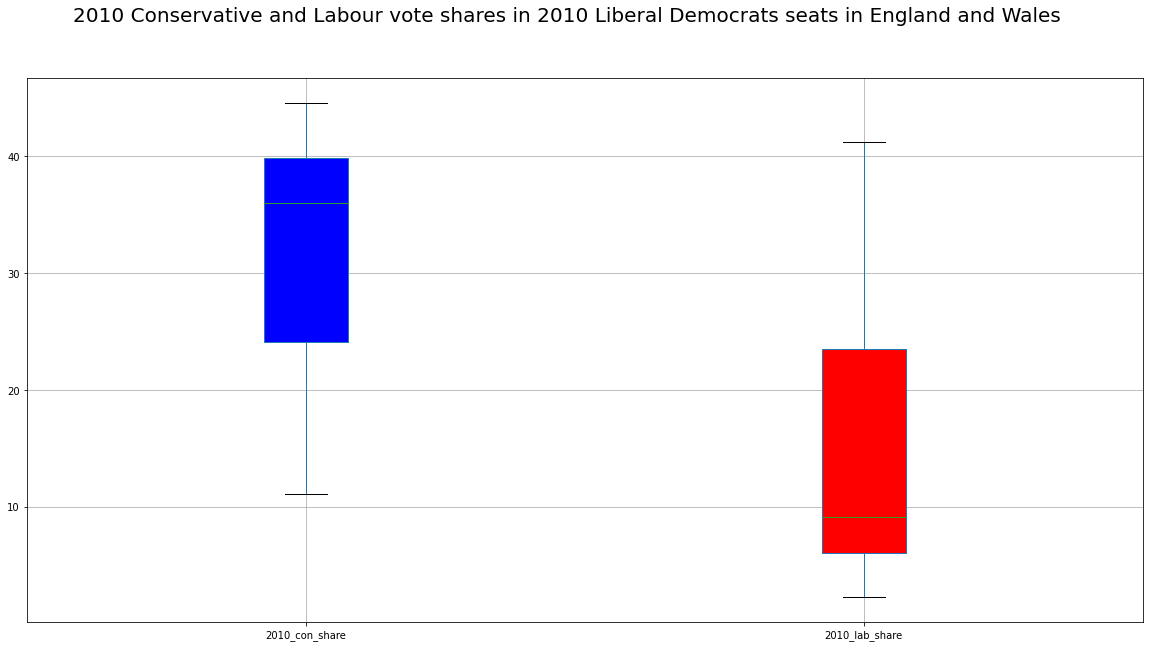

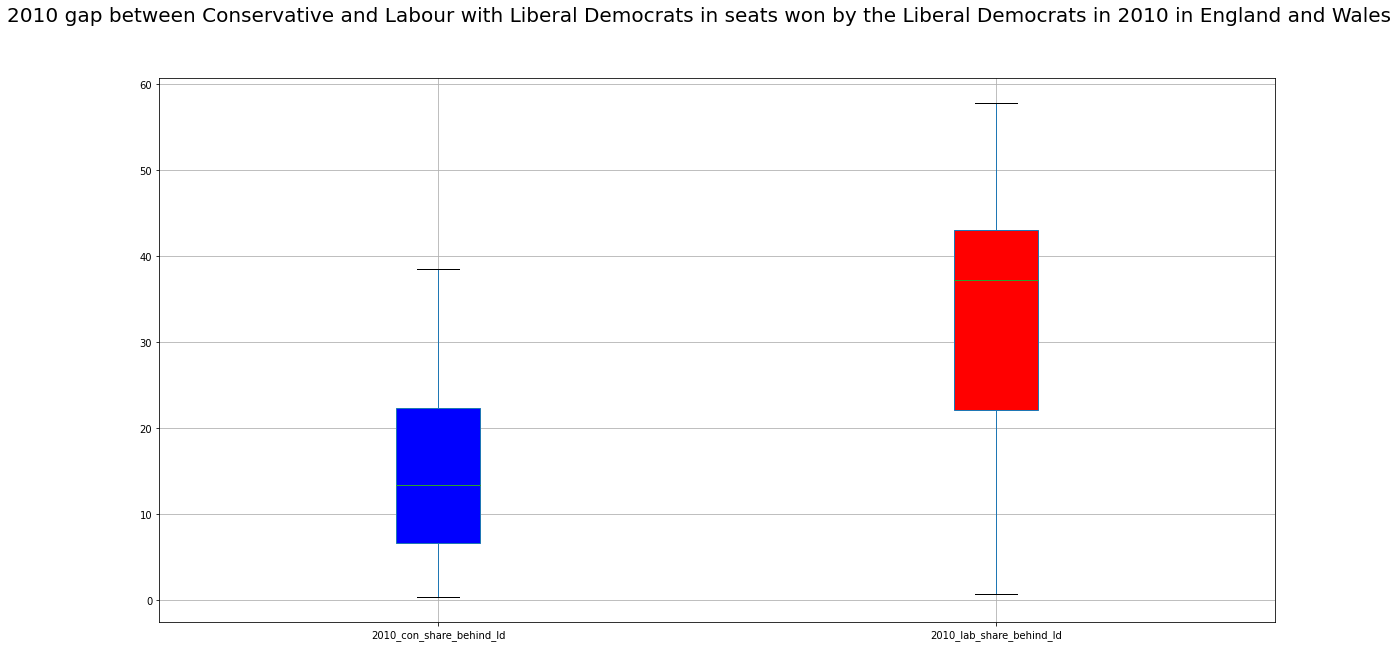

In [15]:
pd.options.mode.chained_assignment = None

lib_dem_2010_wins_not_in_scotland_df.loc[:, "2010_con_share"] = 100*lib_dem_2010_wins_not_in_scotland_df["2010_con"].values/lib_dem_2010_wins_not_in_scotland_df["2010_valid_votes"].values
lib_dem_2010_wins_not_in_scotland_df.loc[:, "2010_lab_share"] = 100*lib_dem_2010_wins_not_in_scotland_df["2010_lab"].values/lib_dem_2010_wins_not_in_scotland_df["2010_valid_votes"].values
fig, ax = plt.subplots(figsize=(20, 10))
boxp = lib_dem_2010_wins_not_in_scotland_df.boxplot(column=["2010_con_share", "2010_lab_share"], ax=ax, sym='', return_type='both', patch_artist = True)
fig.suptitle("2010 Conservative and Labour vote shares in 2010 Liberal Democrats seats in England and Wales", fontsize=20)
boxp[1]["boxes"][0].set_facecolor("blue")
boxp[1]["boxes"][1].set_facecolor("red")
plt.show()

lib_dem_2010_wins_not_in_scotland_df.loc[:, "2010_con_share_behind_ld"] = 100*(lib_dem_2010_wins_not_in_scotland_df["2010_ld"].values - lib_dem_2010_wins_not_in_scotland_df["2010_con"].values)/lib_dem_2010_wins_not_in_scotland_df["2010_valid_votes"].values
lib_dem_2010_wins_not_in_scotland_df.loc[:, "2010_lab_share_behind_ld"] = 100*(lib_dem_2010_wins_not_in_scotland_df["2010_ld"].values - lib_dem_2010_wins_not_in_scotland_df["2010_lab"].values)/lib_dem_2010_wins_not_in_scotland_df["2010_valid_votes"].values
fig, ax = plt.subplots(figsize=(20, 10))
boxp = lib_dem_2010_wins_not_in_scotland_df.boxplot(column=["2010_con_share_behind_ld", "2010_lab_share_behind_ld"], ax=ax, sym='', return_type='both', patch_artist = True)
fig.suptitle("2010 gap between Conservative and Labour with Liberal Democrats in seats won by the Liberal Democrats in 2010 in England and Wales", fontsize=20)
boxp[1]["boxes"][0].set_facecolor("blue")
boxp[1]["boxes"][1].set_facecolor("red")
plt.show()

pd.options.mode.chained_assignment = 'warn'

Here I have limited the data to England and WalesThese boxplots, especially the bottom one, give a more detailed story backing up the claim that the Conservatives were in the best position to gain from the LDs. 

2015 seat distribution of 2010 lib dem seats with 2nd place Conservative: 
con    27
ld      6
lab     1

2015 seat distribution of 2010 lib dem seats with 2nd place Labour: 
lab    11



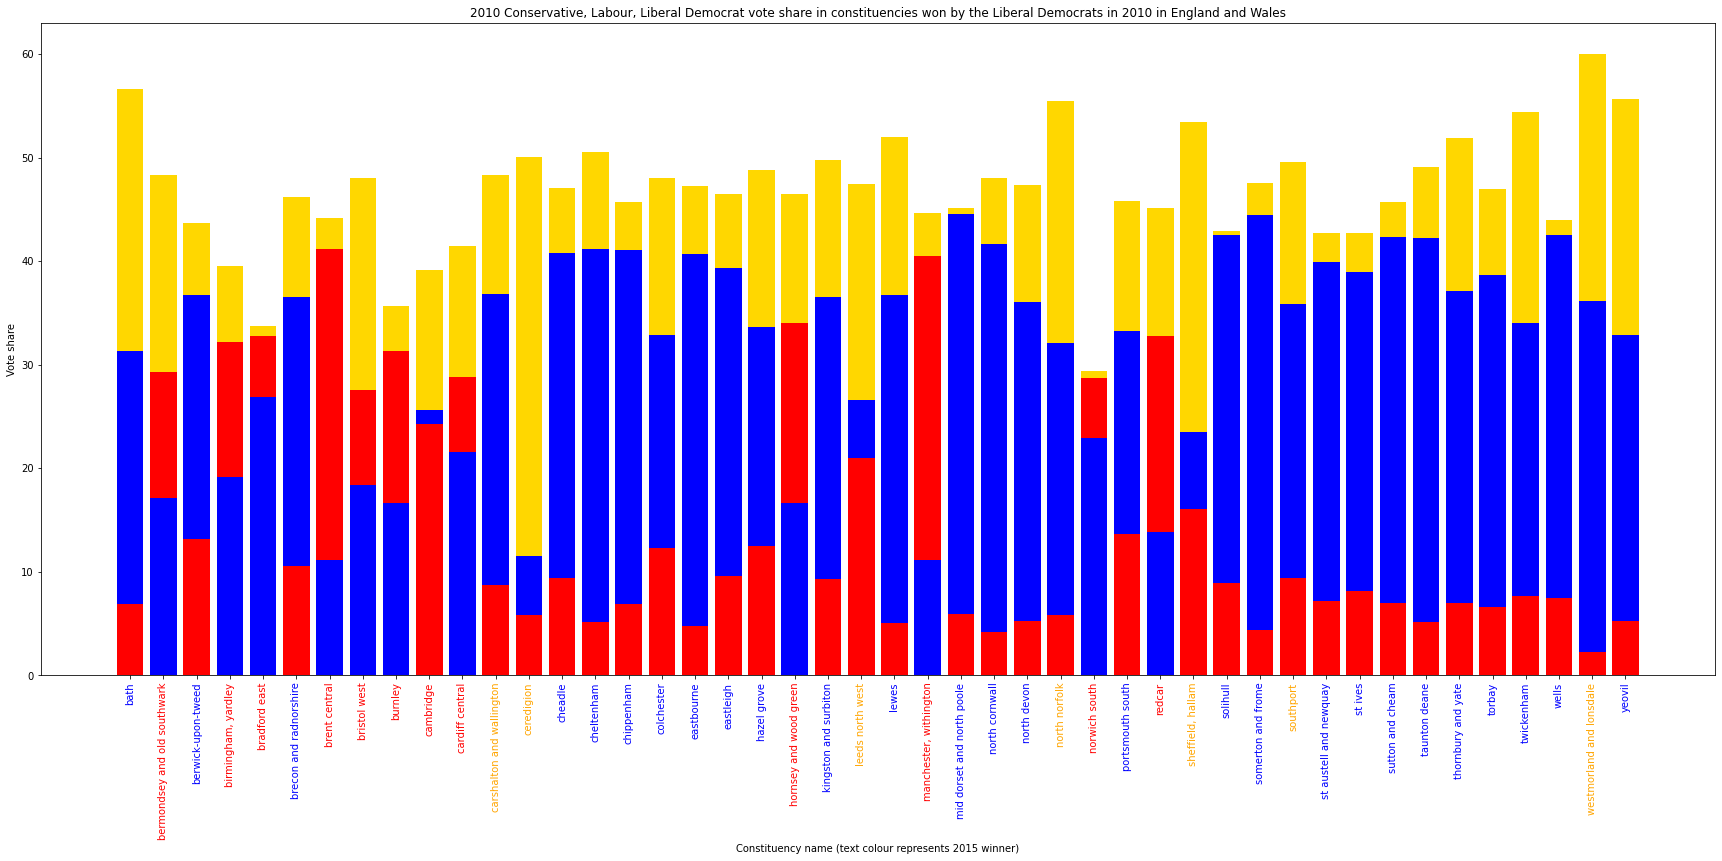

In [16]:
print("2015 seat distribution of 2010 lib dem seats with 2nd place Conservative: ")
print(lib_dem_2010_wins_not_in_scotland_df[lib_dem_2010_wins_not_in_scotland_df["2010_second_party"] == "con"]["2015_first_party"].value_counts().to_string())
print()
print("2015 seat distribution of 2010 lib dem seats with 2nd place Labour: ")
print(lib_dem_2010_wins_not_in_scotland_df[lib_dem_2010_wins_not_in_scotland_df["2010_second_party"] == "lab"]["2015_first_party"].value_counts().to_string())
print()
    
labels = []
labels_2015_winner_colour = []
values_bottom = []
values_middle = []
values_top = []
colours_bottom = []
colours_middle = []
colours_top = []

for index, row in lib_dem_2010_wins_not_in_scotland_df.iterrows():
    constit_name = row["constituency_name"]
    constit_votes = row["2010_valid_votes"]
    labels.append(constit_name)
    if ("lab" == row["2010_second_party"]):
        second_party = "lab"
        third_party = "con"
    else:
        second_party = "con"
        third_party = "lab"
        
    colours_bottom.append(ge_colour_map[third_party])
    colours_middle.append(ge_colour_map[second_party])
    colours_top.append("gold")
    bottom_vote_share = 100*row["2010_" + third_party]/constit_votes
    values_bottom.append(bottom_vote_share)
    middle_vote_share = 100*row["2010_" + second_party]/constit_votes
    values_middle.append(middle_vote_share - bottom_vote_share)
    values_top.append(100*row["2010_ld"]/constit_votes - middle_vote_share)
    labels_2015_winner_colour.append(ge_colour_map[row["2015_first_party"]])

plt.figure(figsize=(30,12))
plt.bar(
    labels,
    values_bottom,
    color=colours_bottom,
)
plt.bar(
    labels,
    values_middle,
    color=colours_middle,
    bottom=values_bottom
)
plt.bar(
    labels,
    values_top,
    color=colours_top,
    bottom=np.array(values_bottom) + np.array(values_middle)
)
plt.xticks(rotation=90)
plt.xlabel("Constituency name (text colour represents 2015 winner)")
plt.ylabel("Vote share")
plt.title("2010 Conservative, Labour, Liberal Democrat vote share in constituencies won by the Liberal Democrats in 2010 in England and Wales")
for i in range(0, len(labels)):
    plt.gca().get_xticklabels()[i].set_color(labels_2015_winner_colour[i]) 
plt.show()

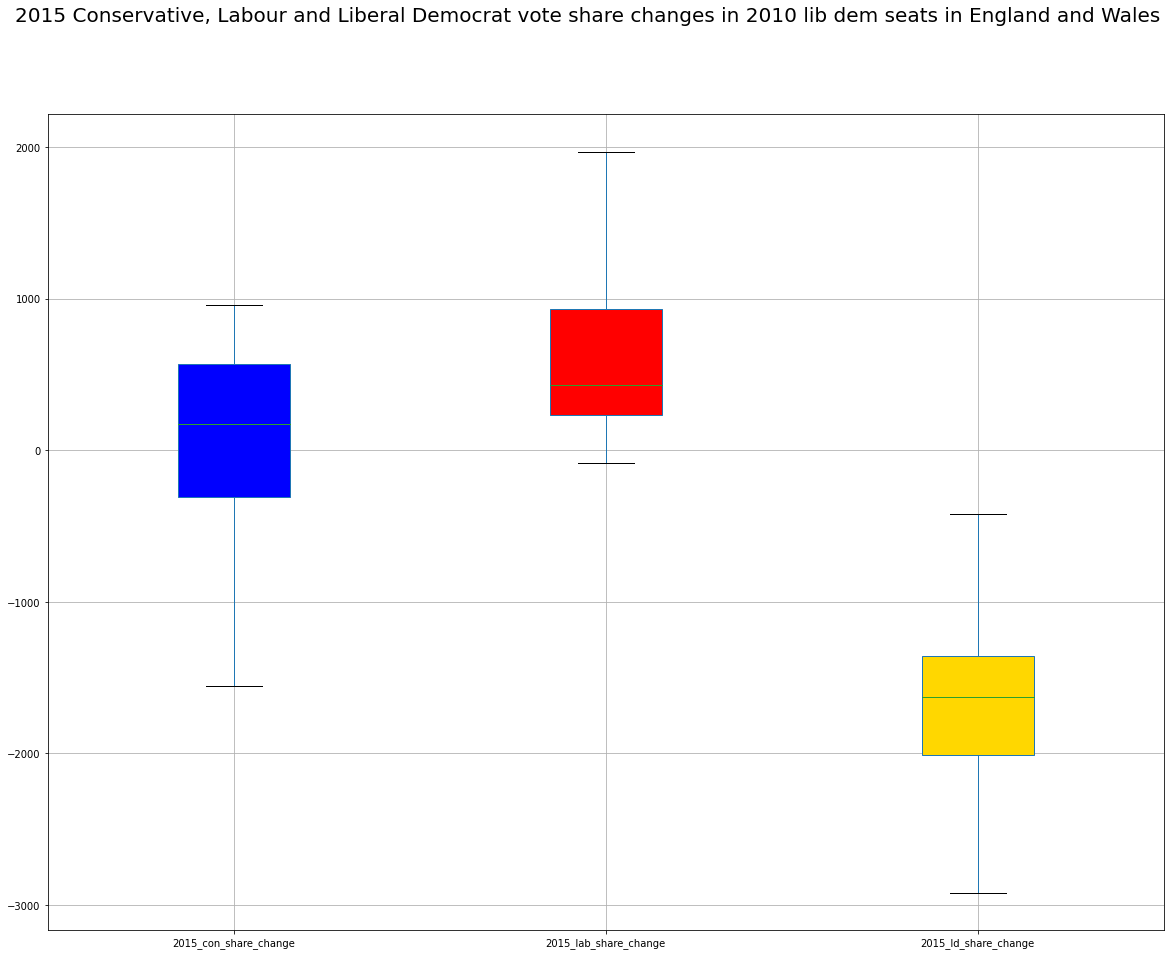


Average Conservative change: 67.4%
Average Labour change: 619.91%
Average Liberal Democrat change: -1682.56%

Average Conservative change in 2010 lib dem, 2015 con seats: 416.39%
Average Labour change in 2010 lib dem, 2015 con seats: 302.42%

Average Conservative change in 2010 lib dem, 2015 lab seats: -381.66%
Average Labour change in 2010 lib dem, 2015 lab seats: 1226.71%


In [17]:
pd.options.mode.chained_assignment = None

lib_dem_2010_wins_not_in_scotland_df.loc[:, "2015_con_share_change"] = lib_dem_2010_wins_not_in_scotland_df.apply(lambda row : 100*election_helper.calculate_share_change(row, recent_year="2015", distant_year="2010", party="con"), axis=1)
lib_dem_2010_wins_not_in_scotland_df.loc[:, "2015_lab_share_change"] = lib_dem_2010_wins_not_in_scotland_df.apply(lambda row : 100*election_helper.calculate_share_change(row, recent_year="2015", distant_year="2010", party="lab"), axis=1)
lib_dem_2010_wins_not_in_scotland_df.loc[:, "2015_ld_share_change"] = lib_dem_2010_wins_not_in_scotland_df.apply(lambda row : 100*election_helper.calculate_share_change(row, recent_year="2015", distant_year="2010", party="ld"), axis=1)

fig, ax = plt.subplots(figsize=(20, 15))
boxp = lib_dem_2010_wins_not_in_scotland_df.boxplot(column=["2015_con_share_change", "2015_lab_share_change", "2015_ld_share_change"], ax=ax, sym='', return_type='both', patch_artist = True)
fig.suptitle("2015 Conservative, Labour and Liberal Democrat vote share changes in 2010 lib dem seats in England and Wales", fontsize=20)
boxp[1]["boxes"][0].set_facecolor("blue")
boxp[1]["boxes"][1].set_facecolor("red")
boxp[1]["boxes"][2].set_facecolor("gold")
plt.show()

pd.options.mode.chained_assignment = 'warn'

print()
print("Average Conservative change: " + str(round(lib_dem_2010_wins_not_in_scotland_df["2015_con_share_change"].mean(), 2)) + "%")
print("Average Labour change: " + str(round(lib_dem_2010_wins_not_in_scotland_df["2015_lab_share_change"].mean(), 2)) + "%")
print("Average Liberal Democrat change: " + str(round(lib_dem_2010_wins_not_in_scotland_df["2015_ld_share_change"].mean(), 2)) + "%")
print()
print("Average Conservative change in 2010 lib dem, 2015 con seats: " + str(round(lib_dem_2010_wins_not_in_scotland_df[lib_dem_2010_wins_not_in_scotland_df["2015_first_party"] == "con"]["2015_con_share_change"].mean(), 2)) + "%")
print("Average Labour change in 2010 lib dem, 2015 con seats: " + str(round(lib_dem_2010_wins_not_in_scotland_df[lib_dem_2010_wins_not_in_scotland_df["2015_first_party"] == "con"]["2015_lab_share_change"].mean(), 2)) + "%")
print()
print("Average Conservative change in 2010 lib dem, 2015 lab seats: " + str(round(lib_dem_2010_wins_not_in_scotland_df[lib_dem_2010_wins_not_in_scotland_df["2015_first_party"] == "lab"]["2015_con_share_change"].mean(), 2)) + "%")
print("Average Labour change in 2010 lib dem, 2015 lab seats: " + str(round(lib_dem_2010_wins_not_in_scotland_df[lib_dem_2010_wins_not_in_scotland_df["2015_first_party"] == "lab"]["2015_lab_share_change"].mean(), 2)) + "%")

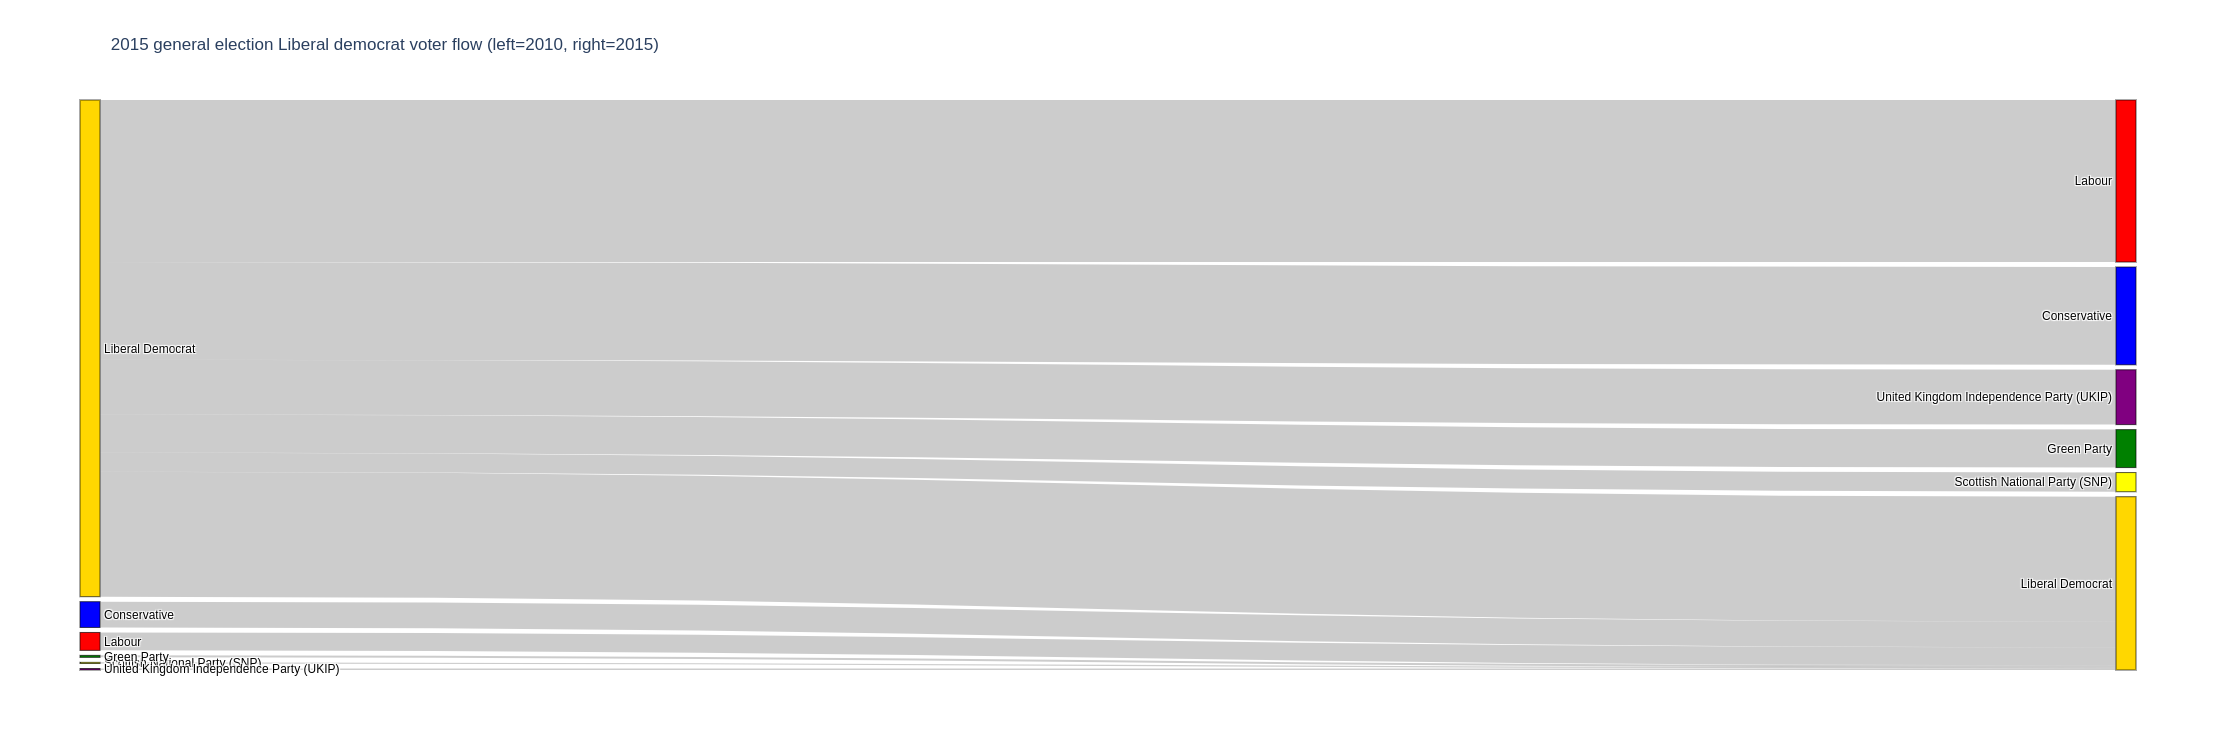

In [18]:
sankey_parties = ["Scottish National Party (SNP)", "Labour",  "Conservative","Liberal Democrat", "United Kingdom Independence Party (UKIP)", "Green Party"]
sankey_party_colours = ["yellow", "red", "blue", "gold", "purple", "green"]

election_helper.create_voter_flow_diagram(bes_df=bes_w6_df[(bes_w6_df["p_past_vote_2010"] == "Liberal Democrat") | (bes_w6_df["general_election_vote"] == "Liberal Democrat")], 
                                          past_election_column="p_past_vote_2010", 
                                          current_election_column="general_election_vote",
                                          weight_column="wt",
                                          parties=sankey_parties,
                                          party_colours=sankey_party_colours,
                                          dont_include=["Don't know", "Didn't vote"],
                                          title="2015 general election Liberal democrat voter flow (left=2010, right=2015)",
                                          other=False)

## England, Wales and UKIP
As we've already discussed, the SNP snapped up 40, all but 1, of Labour's Scottish seats.

In [19]:
election_helper.print_summary_election_result(constits_df[~constits_df["region_name"].isin(["scotland", "northern ireland"])], "2015", constits_df[~constits_df["region_name"].isin(["scotland", "northern ireland"])], "2010", additional_title="Only Wales and England")

=== 2015 general election summary (compared with 2010)
=== Only Wales and England

SEATS WON: 
con       329 (+24)
lab       231 (+14)
ld        7 (-39)
pc        3 (+0)
ukip      1
green     1 (+0)
spk       1

VOTE SHARE:
con       40.1% (+1.3%)
lab       31.9% (+3.4%)
ld        8.1% (-15.9%)
ukip      14.1% (+10.7%)
green     4.1% (+3.1%)
snp       0.0% (+0.0%)
pc        0.7% (+0.0%)
dup       0.0% (+0.0%)
sf        0.0% (+0.0%)
sdlp      0.0% (+0.0%)
uup       0.0% (+0.0%)
alliance  0.0% (+0.0%)
other     1.0% (-2.7%)



/home/graeme/Code/JupyterNotebooks/Election Data Science/utilities.py:213: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



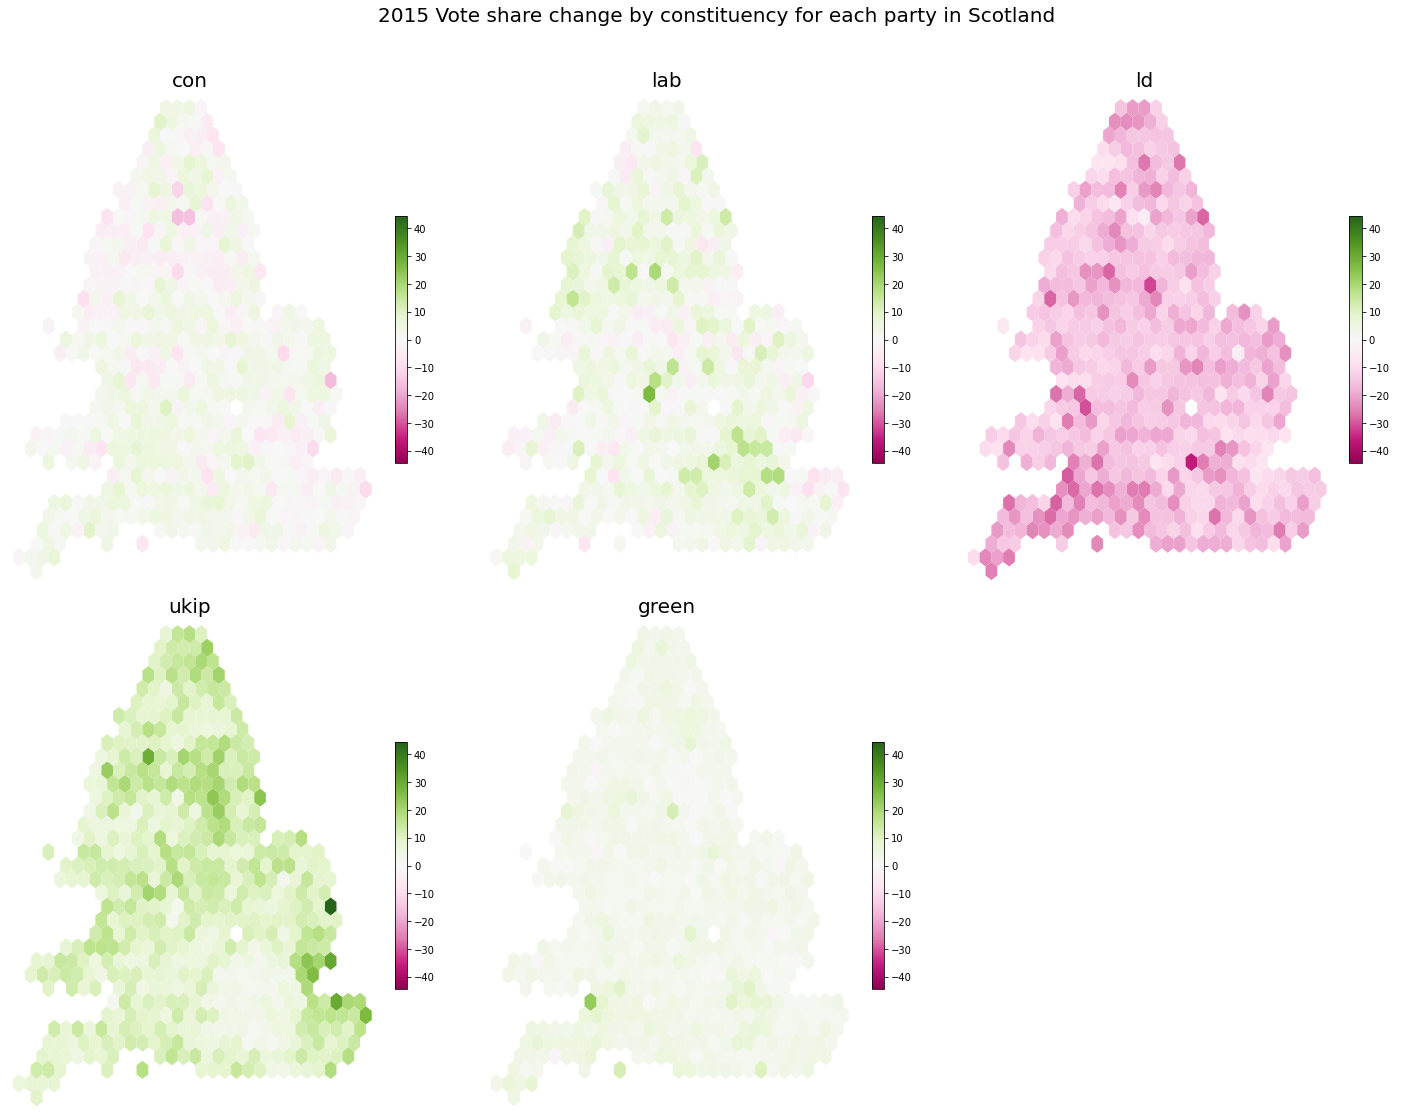

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

election_helper.create_vote_share_change_maps_and_columns(
    df=constits_df[~constits_df["region_name"].isin(["scotland", "northern ireland"])],
    year="2015",
    compare_year="2010",
    party_cols_to_map=["con", "lab", "ld", "ukip", "green"],
    fig=fig,
    axes=axes)

fig.suptitle("2015 Vote share change by constituency for each party in Scotland", fontsize=20, y = 1.05)
axes[1][2].axis("off")
print()

In [21]:
# Where did the lib dems lost seats go?
print("Winner of lib dem 2015 losses:")
print(constits_df[(constits_df["2010_first_party"] == "ld") & (constits_df["2015_first_party"] != "ld")]["2015_first_party"].value_counts().to_string())
# Where did the tory lost seats go?
print("\nWinner of tory 2015 losses:")
print(constits_df[(constits_df["2010_first_party"] == "con") & (constits_df["2015_first_party"] != "con")]["2015_first_party"].value_counts().to_string())
# Where did the labour lost seats go?
print("\nWinner of labour 2015 losses:")
print(constits_df[(constits_df["2010_first_party"] == "lab") & (constits_df["2015_first_party"] != "lab")]["2015_first_party"].value_counts().to_string())

Winner of lib dem 2015 losses:
con    27
lab    12
snp    10

Winner of tory 2015 losses:
lab     10
ukip     1

Winner of labour 2015 losses:
snp    40
con     8


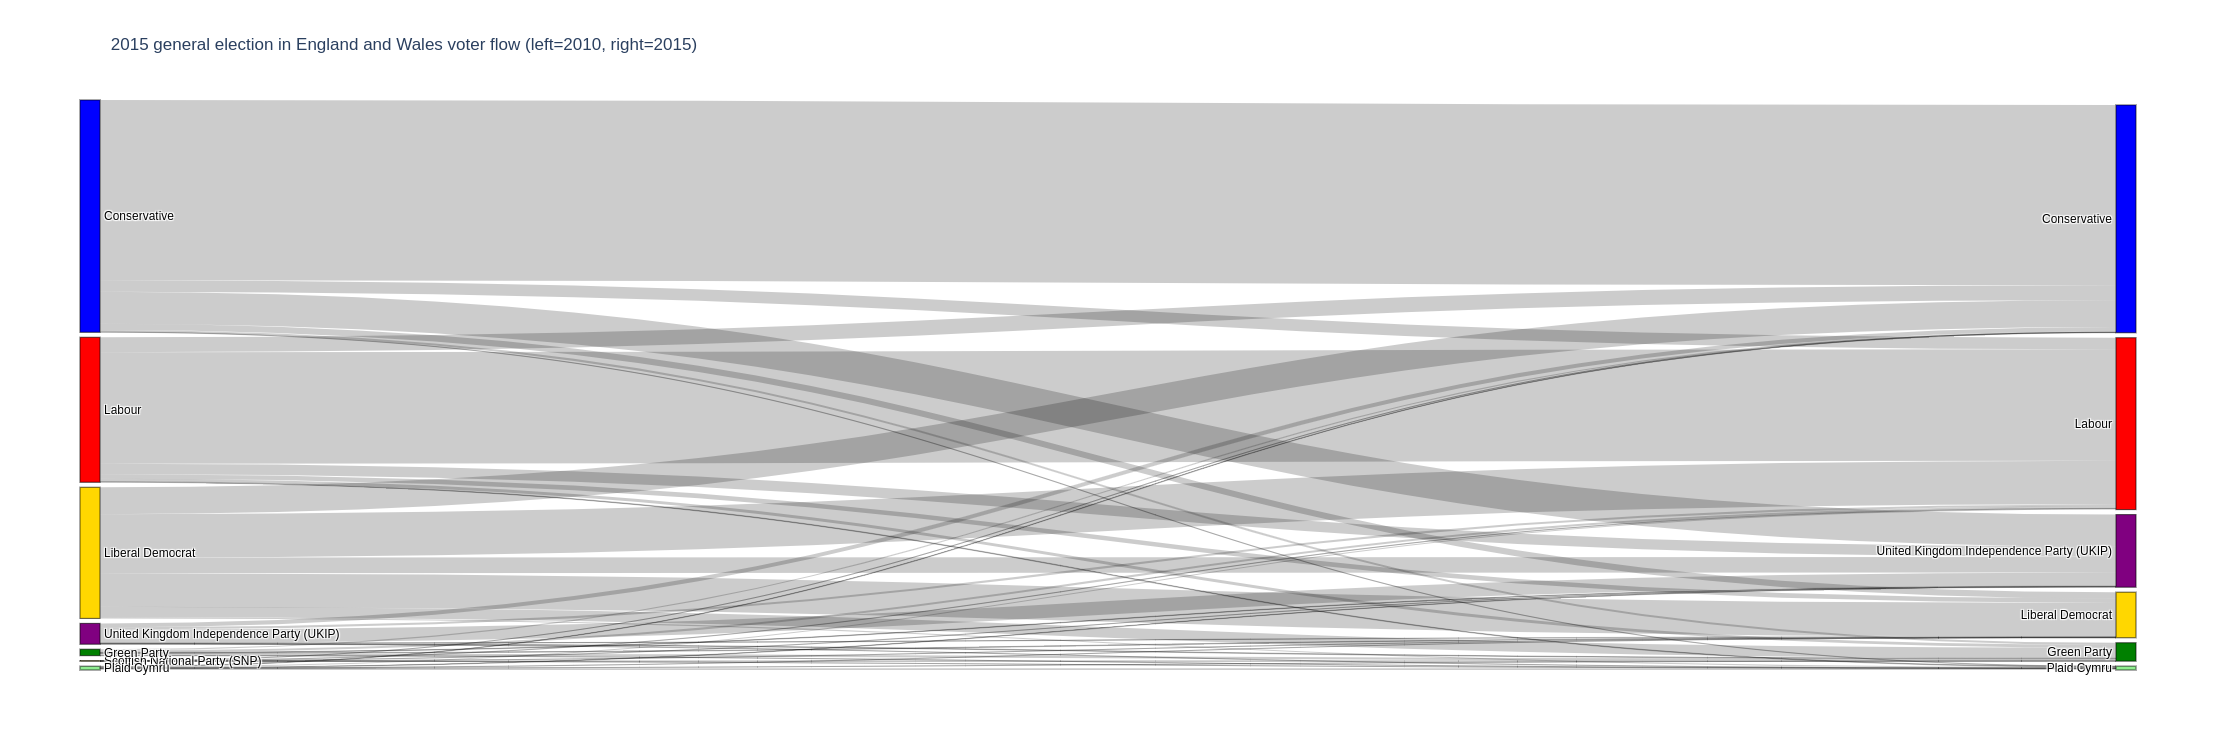

England and Wales aggregate level volatility:  18.597943091197298%
Enlgand and Wales individual level volatility: 38.1871744623569%


In [29]:
sankey_parties = ["Conservative", "Labour", "Liberal Democrat", "United Kingdom Independence Party (UKIP)", "Scottish National Party (SNP)", "Green Party", "Plaid Cymru"]
sankey_party_colours = ["blue", "red", "gold", "purple", "yellow", "green", "lightgreen"]

election_helper.create_voter_flow_diagram(bes_df=bes_w6_df[bes_w6_df["country"] != "Scotland"], 
                                          past_election_column="p_past_vote_2010", 
                                          current_election_column="general_election_vote",
                                          weight_column="wt",
                                          parties=sankey_parties,
                                          party_colours=sankey_party_colours,
                                          dont_include=["Don't know", "Didn't vote"],
                                          title="2015 general election in England and Wales voter flow (left=2010, right=2015)",
                                          other=False)

print("England and Wales aggregate level volatility:  " + str(election_helper.calculate_net_volatility(constits_df[~constits_df["region_name"].isin(["scotland", "northern ireland"])], "2010", "2015")) + "%")
print("Enlgand and Wales individual level volatility: " + str(election_helper.estimate_individual_volatility(bes_w6_df[bes_w6_df["country"] != "Scotland"], "p_past_vote_2010", "p_past_vote_2015", "wt")) + "%")

Text(0.5, 1.05, '2015 Vote share change by constituency for each party')

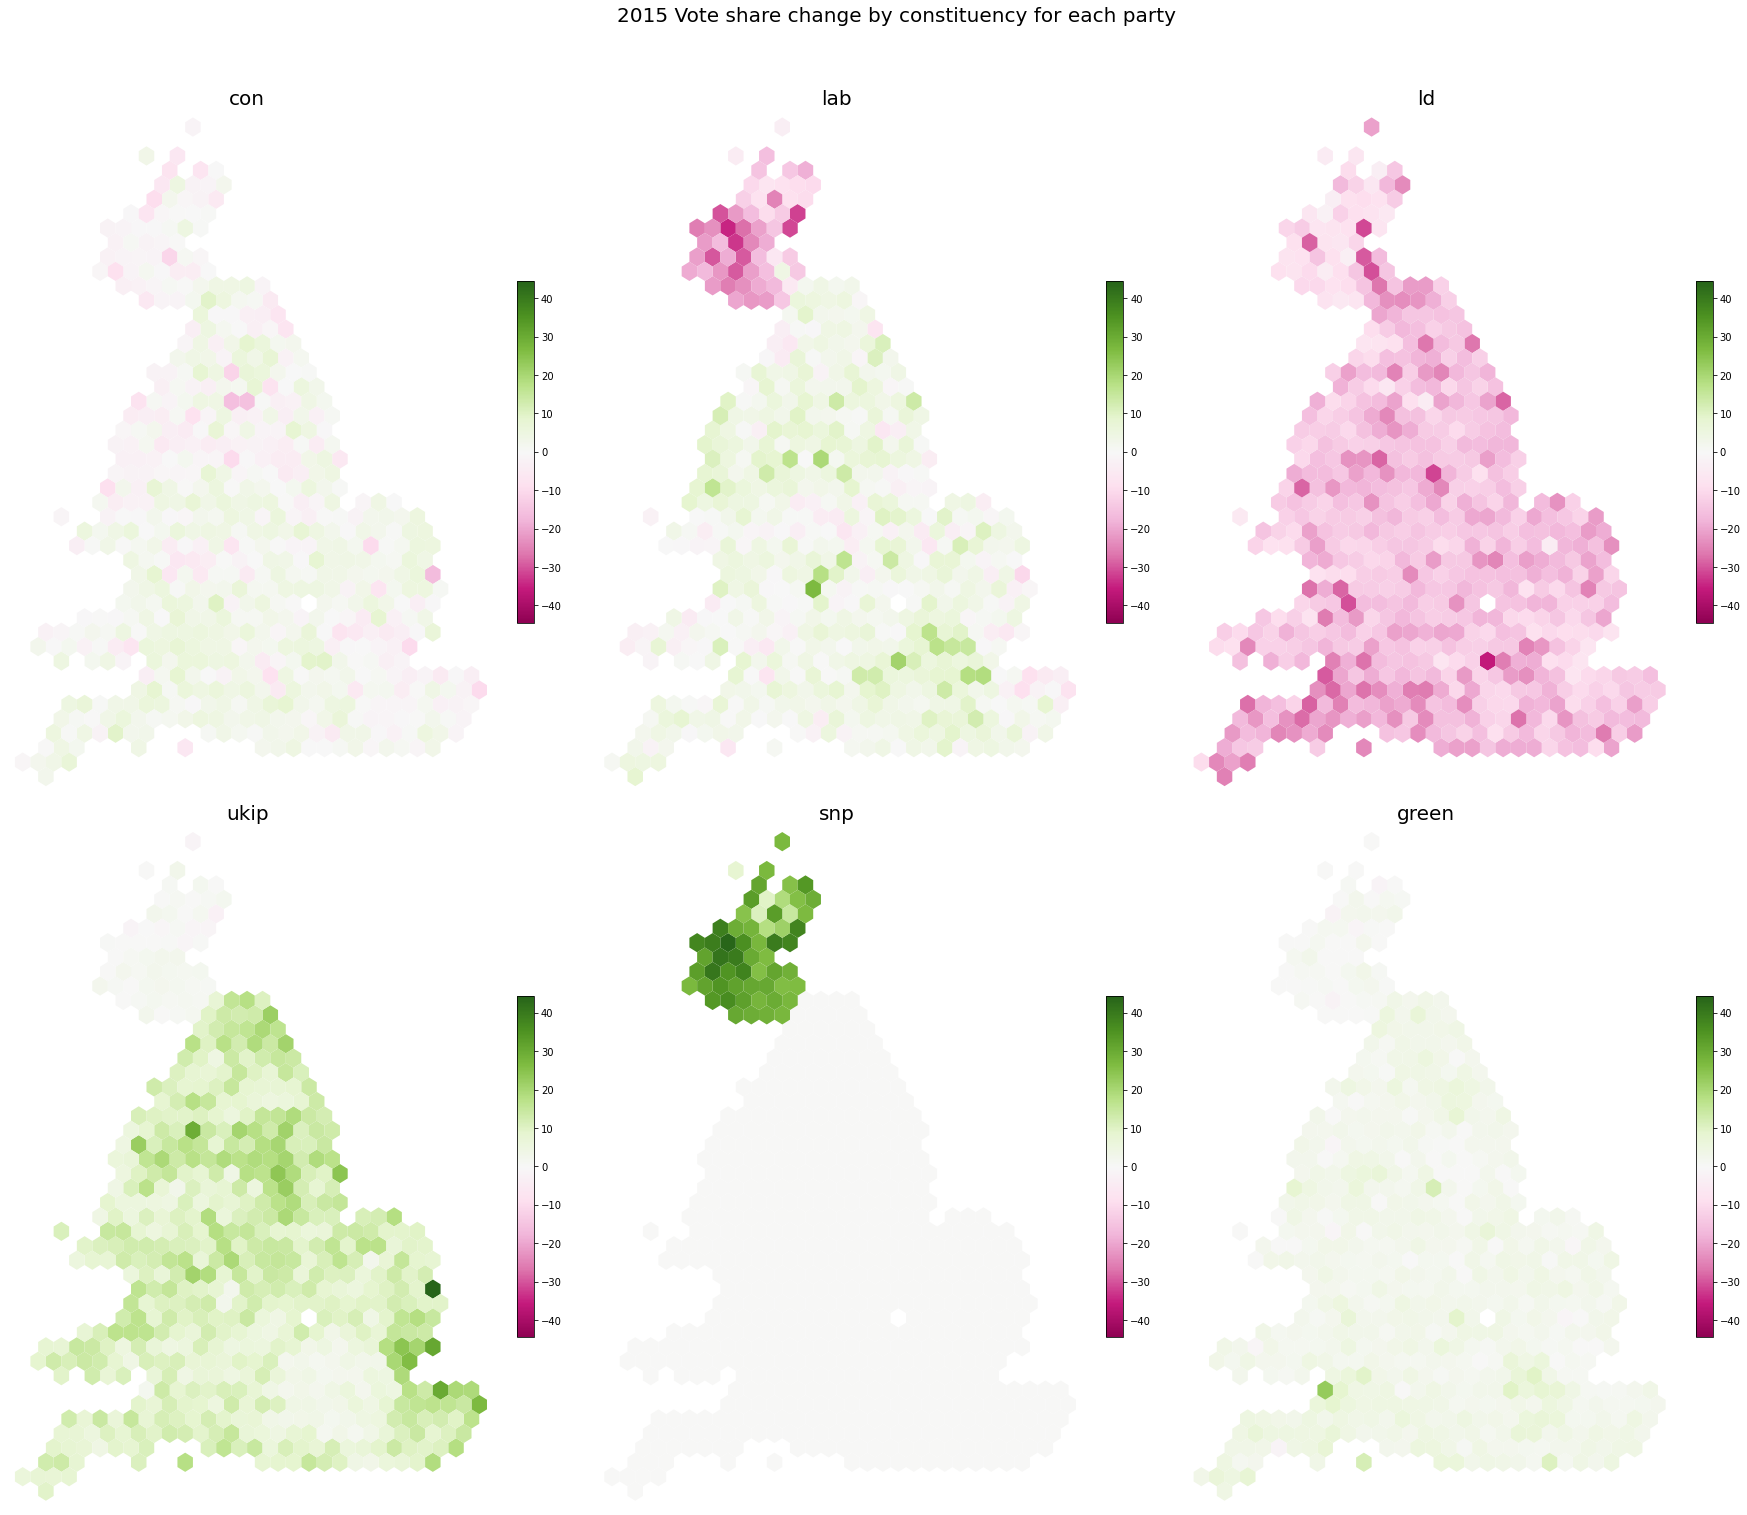

In [23]:
fig, axes = plt.subplots(2, 3, figsize=(25, 20))

constits_df = election_helper.create_vote_share_change_maps_and_columns(
    df=constits_df,
    year="2015",
    compare_year="2010",
    party_cols_to_map=["con", "lab", "ld", "ukip", "snp", "green"],
    fig=fig,
    axes=axes)

fig.suptitle("2015 Vote share change by constituency for each party", fontsize=20, y = 1.05)

## Summary